In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [4]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [5]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


#### Since there is one input and one output column, so this is the case of Simple Linear Regression

In [8]:
x = df.drop(columns='per capita income (US$)')
y = df['per capita income (US$)']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [14]:
x_train

,year
27,1997
32,2002
29,1999
43,2013
2,1972
45,2015
26,1996
15,1985
25,1995
16,1986


In [15]:
x_test

,year
28,1998
33,2003
30,2000
4,1974
18,1988
11,1981
42,2012
31,2001
22,1992
10,1980


In [16]:
y_train

27    17310.757750
32    19232.175560
29    17581.024140
43    42676.468370
2      4251.175484
45    35175.188980
26    16699.826680
15    11018.955850
25    16369.317250
16    11482.891530
40    38420.522890
20    16838.673200
41    42334.711210
8      7247.967035
13    10416.536590
5      5998.144346
17    12974.806620
34    25719.147150
14    10790.328720
37    36144.481220
7      7100.126170
38    37446.486090
1      3768.297935
12     9619.438377
35    29198.055690
24    15755.820270
6      7062.131392
23    15875.586730
36    32738.262900
21    17266.097690
19    16426.725480
9      7602.912681
39    32755.176820
46    34229.193630
3      4804.463248
0      3399.299037
44    41039.893600
Name: per capita income (US$), dtype: float64

In [17]:
y_test

28    16622.671870
33    22739.426280
30    18987.382410
4      5576.514583
18    15080.283450
11     9434.390652
42    42665.255970
31    18601.397240
22    16412.083090
10     8355.968120
Name: per capita income (US$), dtype: float64

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression()

In [20]:
model.predict([[1980]])

C:\Users\MAK TECH\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8395.20312349])

In [21]:
y_pred = model.predict(x_test)
y_pred

array([23487.88766587, 27680.30003875, 25164.85261502,  3364.30827603,
       15103.0629201 ,  9233.68559806, 35226.64230994, 26003.3350896 ,
       18456.99281841,  8395.20312349])

In [22]:
pd.DataFrame({'y_test':y_test, 'y_predict':y_pred})

,y_test,y_predict
28,16622.671870,23487.887666
33,22739.426280,27680.300039
30,18987.382410,25164.852615
4,5576.514583,3364.308276
18,15080.283450,15103.062920
11,9434.390652,9233.685598
42,42665.255970,35226.642310
31,18601.397240,26003.335090
22,16412.083090,18456.992818
10,8355.968120,8395.203123


In [24]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score:', r2_score(y_test, y_pred))

MSE: 22894407.002098337
RMSE: 4784.810027796123
R2_score: 0.7622063756926367


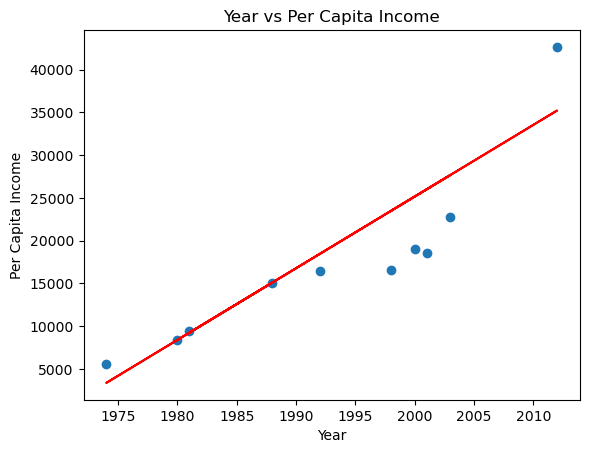

In [29]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')
plt.title("Year vs Per Capita Income")
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.show()

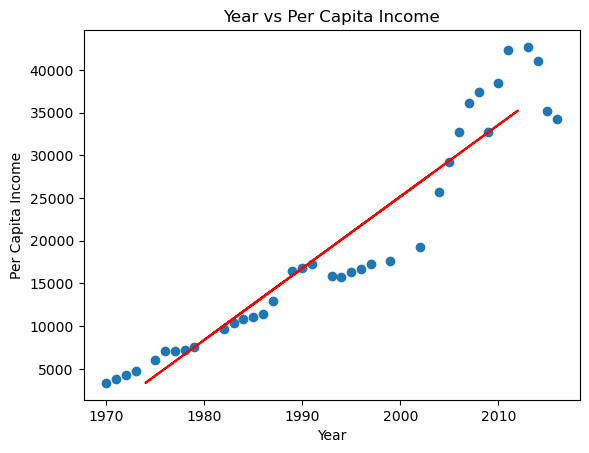

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='r')
plt.title("Year vs Per Capita Income")
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.show()